In [376]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import os
config = {
    "font.family": "sans-serif",
    "font.size": 18,
    "font.sans-serif": ["Helvetica"],
    "xtick.direction": "out",
    "ytick.direction": "out",
    "axes.unicode_minus": False,
    "figure.facecolor" : "none",
    "axes.facecolor" : "none",
    "svg.fonttype":"none",
    'svg.hashsalt':'hell0'
}
plt.rcParams.update(config)
from scipy.interpolate import griddata

In [ ]:
from matplotlib.ticker import FuncFormatter

# 定义一个colorbar标签的格式化函数
def format_func(value, tick_number):
    return f'{value:.2f}' 

In [ ]:
from colormap import Colormap
c = Colormap()
map = c.get_cmap_heat()
c.test_colormap(map)

./cool-0.3/0000572000.txt
2.6973007161145998e-12 3120.0000003432456
100.89493170434704 135.00913492872104


TypeError: Input z must be 2D, not 1D

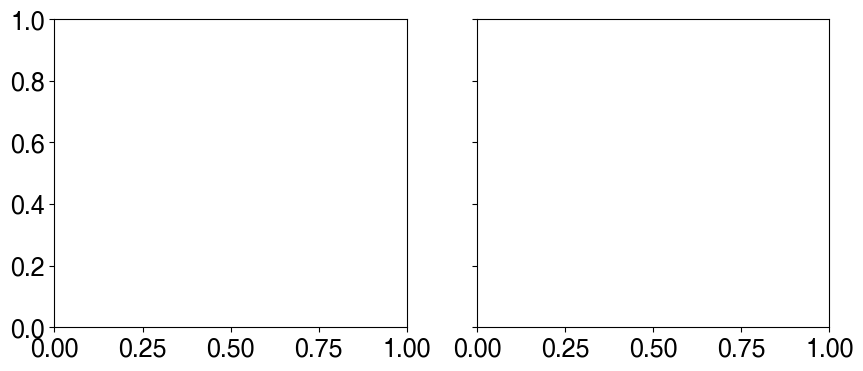

In [375]:
path = './cool-0.3/'
filenames = os.listdir(path)

index = -2
d = np.loadtxt(path+filenames[index])
print(path+filenames[index])
#x, y, z, co2ice_mass, co2ice_t, co2_t, ice_p, ice_t,
x = d[:,0]
y = d[:,1]
# 二氧化碳冰
co2ice = d[:,3]
# 二氧化碳冰温度
co2ice_t = d[:,4]
#
co2_t  = d[:,5]
p = d[:,6]
ice_t = d[:,7]
t_b = d[:,8]
# print(np.sort(p, kind='quicksort')[::-1])
# print(p.min(),p.max())
print(co2ice.min(),co2ice.max())
print(co2ice_t.min(),co2ice_t.max())

# xi = np.linspace(x.min(), x.max(), 1000)
# yi = np.linspace(y.min(), y.max(), 1000)
# xi, yi = np.meshgrid(xi, yi)
# zi1 = griddata((x, y), co2ice_t, (xi, yi), method='cubic')
# zi2 = griddata((x, y), co2ice, (xi, yi), method='cubic')

fig,axs = plt.subplots(1,2,figsize=(10,4), sharey='row')


# cs = ax.contourf(xi, yi, zi, cmap='Blues')
cs1 = axs[0].contourf(x, y, co2ice, cmap='gist_heat_r',levels = np.linspace(100,130,31),extend='max')
fig.colorbar(cs1,format = '%.0f')  # 添加颜色条
# cs2 = axs[1].contourf(xi, yi, zi2, cmap='Blues',levels = np.linspace(0,3200,11))
# fig.colorbar(cs2,format = '%.0f')  # 添加颜色条

# cbar = plt.colorbar(cs, label=r'CO$\mathrm{_2}$ ice (kg)')  # 添加颜色条


# ax.spines['right'].set_visible(False)
# ax.spines['top'].set_visible(False)
# ax.spines['left'].set_visible(False)
# ax.spines['bottom'].set_visible(False)

axs[0].set_xlim(-100,100)
axs[1].set_xlim(-100,100)
axs[0].set_ylim(-100,100)
axs[1].set_ylim(-100,100)
# plt.xticks([])
# plt.yticks([])
# plt.xlabel('x (m)')
# plt.ylabel('y (m)')
# plt.tick_params(axis='x', color='white',length=5)
# plt.tick_params(axis='y', color='white',length=5)
plt.tight_layout()
plt.savefig('./test.svg')
plt.show()


./cool-0.5/0000470000.txt


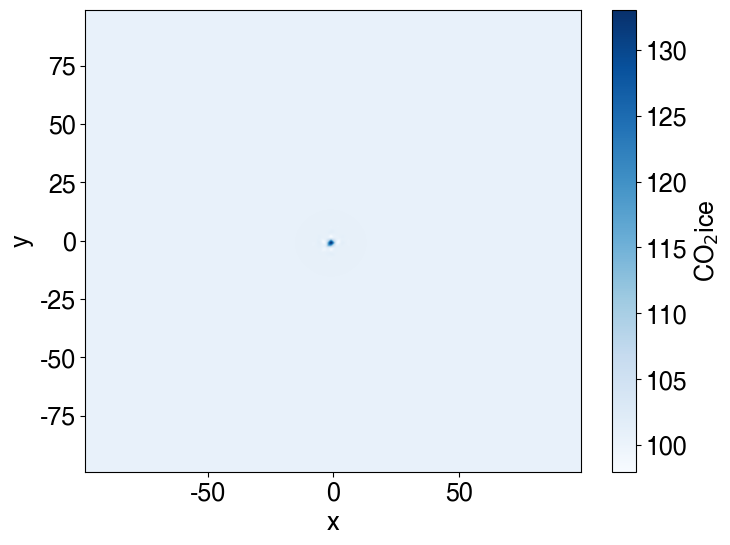

In [364]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import griddata


# 读取数据
# 假设txt文件的列分隔符是空格或制表符
path = './cool-0.5/'
filenames = os.listdir(path)
index = -20
print(path+filenames[index])
data = pd.read_csv(path+filenames[index], sep='\t', header=None, names=['x', 'y', 'z', 'co2ice', 'co2ice_t', 'co2_t', 'ice_p', 'ice_t','t_b'])


# 创建网格
x = data['x']
y = data['y']
z = data['co2ice_t']

# 创建用于插值的网格
xi = np.linspace(x.min(), x.max(), 500)
yi = np.linspace(y.min(), y.max(), 500)
xi, yi = np.meshgrid(xi, yi)

# 插值
zi = griddata((x, y), z, (xi, yi), method='cubic')

# 绘制图形
plt.figure(figsize=(8, 6))
plt.imshow(zi, extent=[x.min(), x.max(), y.min(), y.max()], origin='lower',cmap='Blues', aspect='auto')
plt.colorbar(label='CO$_2$ice')
plt.xlabel('x')
plt.ylabel('y')
# plt.title('二氧化碳冰质量分布')
plt.show()
